<a href="https://colab.research.google.com/github/Farhaj499/Multi_AI_Agent_with_RAG_and_WikiSearch/blob/main/Multi_Ai_Agent_RAG_with_AstraDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain langgraph cassio

In [ ]:
import cassio
from google.colab import userdata
# Connecting AstraDB

ASTRA_DB_TOKEN = "AstraCS:JYTlbDqgmAnzbfykKAeOGDSm:ff145550f26d5bfdba4b0a702233c71028950a8daecd92f47f3565f66441c1f1"
ASTRA_DB_ID = userdata.get("DATABASE_ID")

cassio.init(token = ASTRA_DB_TOKEN, database_id = ASTRA_DB_ID)



In [ ]:
!pip install langchain_community

In [ ]:
!pip install -U tiktoken langchain_groq langchainhub chromadb langchain_huggingface

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

urls = [
    "https://github.com/panaversity/panaversity-website"
]

# load url

docs = [WebBaseLoader(url).load() for url in urls]

docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size = 500, chunk_overlap = 0)
docs_split = text_splitter.split_documents(docs_list)

docs_split



[Document(metadata={'source': 'https://github.com/panaversity/panaversity-website', 'title': 'GitHub - panaversity/panaversity-website', 'description': 'Contribute to panaversity/panaversity-website development by creating an account on GitHub.', 'language': 'en'}, page_content='GitHub - panaversity/panaversity-website\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\nNavigation Menu\n\nToggle navigation\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n            Sign in\n          \n\n\n\n\n\n\n\n\n        Product\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\nGitHub Copilot\n        Write better code with AI\n      \n\n\n\n\n\n\n\nSecurity\n        Find and fix vulnerabilities\n      \n\n\n\n\n\n\n\nActions\n        Automate any workflow\n      \n\n\n\n\n\n\n\nCodespaces\n        Instant dev environments\n      \n\n\n\n\n\n\n\nIssues\n        Plan and track work\n      \n\n\n\n\n\n\n\nCode Review\n        Manage code chang

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings

# converting to vectors
embeddings = HuggingFaceEmbeddings(model_name = "all-MiniLM-L6-v2")





In [ ]:
from langchain.vectorstores.cassandra import Cassandra
astra_db_store = Cassandra(embedding = embeddings,
                           table_name = "qa_mini_demo",
                           session = None,
                           keyspace = None)

In [ ]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper

astra_db_store.add_documents(docs_split)

print("Inserted %i headlines " % len(docs_split))

astra_vector_index = VectorStoreIndexWrapper(vectorstore = astra_db_store)


Inserted 7 headlines 


In [ ]:
retriever = astra_db_store.as_retriever()

retriever.invoke("What is panaversity")

[Document(id='17f66efb2c634eb4a0e9b80e9b8032d7', metadata={'description': 'Contribute to panaversity/panaversity-website development by creating an account on GitHub.', 'language': 'en', 'source': 'https://github.com/panaversity/panaversity-website', 'title': 'GitHub - panaversity/panaversity-website'}, page_content="mainBranchesTagsGo to fileCodeFolders and filesNameNameLast commit messageLast commit dateLatest commit\xa0History5 CommitsemailTemplatesemailTemplates\xa0\xa0public/kpkpublic/kpk\xa0\xa0srcsrc\xa0\xa0README.mdREADME.md\xa0\xa0components.jsoncomponents.json\xa0\xa0drizzle.config.tsdrizzle.config.ts\xa0\xa0next.config.mjsnext.config.mjs\xa0\xa0package.jsonpackage.json\xa0\xa0pnpm-lock.yamlpnpm-lock.yaml\xa0\xa0postcss.config.mjspostcss.config.mjs\xa0\xa0tailwind.config.tstailwind.config.ts\xa0\xa0tsconfig.jsontsconfig.json\xa0\xa0View all filesRepository files navigationREADMEPanaversity: Forge the Future. Online.\nShape the world with the most cutting-edge technologies.\nP

In [ ]:
## Langgraph

from typing import Literal

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

In [ ]:
class RouteQuery(BaseModel):
  """ Routes the user query to either the vector database or wiki-search """
  datasource: Literal["vector_store", "wiki_search"] = Field(
      ...,
      description="Given a user question, choose it to route it to vector store or wikipedia_search"
  )



In [ ]:
from langchain_groq import ChatGroq
from google.colab import userdata
import os

groq_api_key = userdata.get("GROQ_API_KEY")


In [ ]:
llm: ChatGroq = ChatGroq(groq_api_key = groq_api_key,
                         model_name = "Llama-3.1-70b-Versatile")

llm.invoke("Hi")

AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 36, 'total_tokens': 44, 'completion_time': 0.032, 'prompt_time': 0.006779529, 'queue_time': 0.007846500999999999, 'total_time': 0.038779529}, 'model_name': 'Llama-3.1-70b-Versatile', 'system_fingerprint': 'fp_b6828be2c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-7291b266-e00a-4ca1-a8da-5be9f21365bd-0', usage_metadata={'input_tokens': 36, 'output_tokens': 8, 'total_tokens': 44})

In [ ]:
structured_llm_router = llm.with_structured_output(RouteQuery)

In [ ]:
# Prompt

system_message = """ You are an expert at routing the user question to vector_store or wikipedia.
The vector store contains documents related to panaversity github repo.
Use the vector store for questions on this topic. Otherwise use wikipedia. """
route_prompt= ChatPromptTemplate.from_messages([
    ("system", system_message),
    ("user", "{question}")
])

question_router = route_prompt | structured_llm_router


In [ ]:
print(question_router.invoke({"question": "What is panaversity"}))

datasource='vector_store'


In [ ]:
print(question_router.invoke({"question": "Who is founder of google"}))

datasource='wiki_search'


In [ ]:
!pip install wikipedia

In [ ]:
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun

api_wrapper = WikipediaAPIWrapper()
wiki = WikipediaQueryRun(api_wrapper = api_wrapper)
#

In [ ]:
wiki.run("Tell me about Shah rukh khan")

'Page: Shah Rukh Khan\nSummary: Shahrukh Khan (pronounced [ˈʃɑːɦɾʊx xɑːn] ; born 2 November 1965), also known by the initialism SRK, is an Indian actor and film producer who works in Hindi cinema. Referred to in the media as the "Baadshah of Bollywood" and "King Khan", he has appeared in more than 100 films, and earned numerous accolades, including 14 Filmfare Awards. He has been awarded the Padma Shri by the Government of India, as well as the Order of Arts and Letters and Legion of Honour by the Government of France. Khan has a significant following in Asia and the Indian diaspora worldwide. In terms of audience size and income, several media outlets have described him as one of the most successful film stars in the world. Many of his films thematise Indian national identity and connections with diaspora communities, or gender, racial, social and religious differences and grievances.\nKhan began his career with appearances in several television series in the late 1980s and made his B

In [ ]:
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
  """
  Represents the state of the graph.

  Attributes:
    question: question
    generation: LLM generation
    documents: list of documents

  """

  question: str
  generation: str
  documents: List[str]



In [ ]:
from langchain.schema import Document

def retrieve(state):
  """
  Retrieve documents

  Args:
    state (dict): current GraphState

  Returns:
    state (dict): New key added to state, documents, that contain retrieved documents
  """

  print("--- Retrieved ---")
  question = state["question"]

  documents = retriever.invoke(question)
  state["documents"] = documents
  return state

In [ ]:
def wiki_search(state):
  """
  Wikipedia search based on rephrased question

  Args:
    state (dict): current GraphState

  Returns:
    state (dict): Updates document key with search results
  """

  print("--- Wikipedia Search ---")
  question = state["question"]
  wiki_results = wiki.invoke({"query": question})
  wiki_results = Document(page_content = wiki_results)
  state["documents"] = wiki_results
  return state

In [ ]:
def route(state):
  """
  Route question to wikipedia or vector_search

  Args:
    state (dict): current graph state

  Returns:
    str: next node to call
  """

  print("--- Routing ---")

  question = state["question"]
  source = question_router.invoke({"question": question})

  if source.datasource == "vector_store":
    return "vector_store"
  else:
    return "wiki_search"

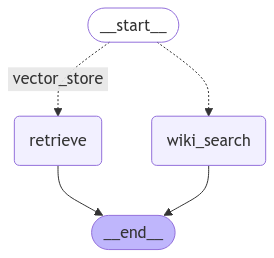

In [ ]:
from langgraph.graph import END, StateGraph, START
from IPython.display import Image, display

builder: StateGraph = StateGraph(GraphState)

builder.add_node("wiki_search", wiki_search)
builder.add_node("retrieve", retrieve)

builder.add_conditional_edges(START,
                              route,
                               { "wiki_search":"wiki_search", "vector_store": "retrieve"}, )

builder.add_edge("retrieve", END)
builder.add_edge("wiki_search", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
from pprint import pprint

input = {
    "question": "Tell me about panaversity"
}

for output in graph.stream(input):
  for key, value in output.items():
    pprint(f"Node '{key}':")
  pprint("\n---\n")

pprint(value["documents"][0].dict()["metadata"]["description"])

--- Routing ---


--- Retrieved ---
"Node 'retrieve':"
'\n---\n'
('Contribute to panaversity/panaversity-website development by creating an '
 'account on GitHub.')


In [ ]:
from pprint import pprint

input = {
    "question": "Tell me about avengers"
}

for output in graph.stream(input):
  for key, value in output.items():
    pprint(f"Node '{key}':")
  pprint("\n---\n")

pprint(value["documents"])

--- Routing ---
--- Wikipedia Search ---
"Node 'wiki_search':"
'\n---\n'
Document(metadata={}, page_content="Page: The Avengers (2012 film)\nSummary: Marvel's The Avengers (titled Marvel Avengers Assemble in the United Kingdom and Ireland and commonly referred to as simply The Avengers) is a 2012 American superhero film based on the Marvel Comics superhero team of the same name. Produced by Marvel Studios and distributed by Walt Disney Studios Motion Pictures, it is the sixth film in the Marvel Cinematic Universe (MCU). Written and directed by Joss Whedon, the film features an ensemble cast including Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth, Scarlett Johansson, and Jeremy Renner as the Avengers, alongside Tom Hiddleston, Stellan Skarsgård, and Samuel L. Jackson. In the film, Nick Fury and the spy agency S.H.I.E.L.D. recruit Tony Stark, Steve Rogers, Bruce Banner, Thor, Natasha Romanoff, and Clint Barton to form a team capable of stopping Thor's brother Loki from su